# Running Kmeans with Scaled Replace data - KNN

Now we get to run our newly sampled data into a clustering alogrithm to get results

In [15]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import os
import torch
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

np.random.seed(42)

## Establishing the path

In [16]:
path = "../SHARED/"

## Recompletion data

In [17]:
# Reading data
data_pd = pd.read_excel(path + "RCOMPL_RIG_SCALED_REPLACE.xlsx")

In [18]:
data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Columns: 150 entries, Unnamed: 0 to SITE_SUPERVISOR
dtypes: float64(45), int64(81), object(24)
memory usage: 1.9+ MB


In [19]:
# Here we want to go ahead and take all the numerical data as there are labels
# in this data
subset = data_pd.loc[:, data_pd.dtypes!=object]
subset

,Unnamed: 0,UWI,UWI_SIDETRACK,REPORT_START_DATE_YEAR,FRAC_GRADIENT,BREAKDOWN_PRESSURE,HYDROSTATIC_PRESSURE,TREAT_AVG_PRESSURE,TREAT_MAX_PRESSURE,TREAT_MIN_PRESSURE,...,DIVERSION_METHOD_cat,DELIVERY_MODE_cat,BOTTOM_HOLE_PRESSURE_METHOD_cat,CLOSURE_PRESSURE_METHOD_cat,STIMULATION_RESULT_cat,STIMULATION_RESULT_DETAIL_cat,STIMTREAT_ID_cat,FLUID_NAME_cat,SITE_SUPERVISOR_cat,CONTRACTOR_cat
0,0,2019000635,0,2019,1.0,7153.0,5588.0,9343,9588,7618.0,...,8.0,0,0,0.0,1,0.0,713,18.0,3.0,2
1,1,2019000635,0,2019,1.0,7537.0,5577.0,9390,9543,7618.0,...,8.0,0,0,0.0,1,0.0,1416,18.0,26.0,2
2,2,2019001382,0,2017,1.0,7006.0,5430.0,8666,9267,7006.0,...,9.0,0,0,0.2,1,0.0,934,3.0,16.0,2
3,3,2019000635,0,2019,1.0,8536.0,5543.0,9272,9492,7618.0,...,8.0,0,0,0.0,1,0.0,105,18.0,3.0,2
4,4,2019001293,0,2019,1.0,7988.0,5715.0,8270,8597,7872.0,...,18.0,0,0,0.0,1,0.0,1216,14.0,49.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,1645,2019000278,0,2019,1.0,5560.0,5133.0,8373,8729,7618.0,...,8.0,0,0,0.0,1,0.0,844,33.0,17.0,4
1646,1646,2019000278,0,2019,1.0,5335.0,5119.2,8561,9179,7618.0,...,8.0,0,0,0.0,1,0.0,1112,33.0,19.0,4
1647,1647,2019000278,0,2019,1.0,5319.0,5119.2,8305,9116,7618.0,...,8.0,0,0,0.0,1,0.0,10,33.0,3.0,4
1648,1648,2019000278,0,2019,1.0,5116.0,5122.6,8303,8612,7618.0,...,8.0,0,0,0.0,1,0.0,958,33.0,19.0,4


In [20]:
# We want to scale the data
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(subset), columns=subset.columns)

In [21]:
scaled_df

,Unnamed: 0,UWI,UWI_SIDETRACK,REPORT_START_DATE_YEAR,FRAC_GRADIENT,BREAKDOWN_PRESSURE,HYDROSTATIC_PRESSURE,TREAT_AVG_PRESSURE,TREAT_MAX_PRESSURE,TREAT_MIN_PRESSURE,...,DIVERSION_METHOD_cat,DELIVERY_MODE_cat,BOTTOM_HOLE_PRESSURE_METHOD_cat,CLOSURE_PRESSURE_METHOD_cat,STIMULATION_RESULT_cat,STIMULATION_RESULT_DETAIL_cat,STIMTREAT_ID_cat,FLUID_NAME_cat,SITE_SUPERVISOR_cat,CONTRACTOR_cat
0,0.000000,0.344249,0.0,1.0,1.0,0.699697,0.943816,0.806773,0.790026,0.830752,...,0.444444,0.0,0.0,0.0,1.0,0.0,0.427876,0.459459,0.044776,0.5
1,0.000606,0.344249,0.0,1.0,1.0,0.737259,0.941776,0.815284,0.781745,0.830752,...,0.444444,0.0,0.0,0.0,1.0,0.0,0.855752,0.459459,0.388060,0.5
2,0.001213,0.971453,0.0,0.0,1.0,0.685317,0.914519,0.684172,0.730953,0.764013,...,0.500000,0.0,0.0,0.2,1.0,0.0,0.562386,0.054054,0.238806,0.5
3,0.001819,0.344249,0.0,1.0,1.0,0.834980,0.935472,0.793915,0.772359,0.830752,...,0.444444,0.0,0.0,0.0,1.0,0.0,0.057821,0.459459,0.044776,0.5
4,0.002426,0.896725,0.0,1.0,1.0,0.781375,0.967365,0.612459,0.607656,0.858451,...,1.000000,0.0,0.0,0.0,1.0,0.0,0.734023,0.351351,0.731343,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,0.997574,0.044500,0.0,1.0,1.0,0.543872,0.859447,0.631112,0.631947,0.830752,...,0.444444,0.0,0.0,0.0,1.0,0.0,0.507608,0.864865,0.253731,1.0
1646,0.998181,0.044500,0.0,1.0,1.0,0.521862,0.856889,0.665158,0.714759,0.830752,...,0.444444,0.0,0.0,0.0,1.0,0.0,0.670724,0.864865,0.283582,1.0
1647,0.998787,0.044500,0.0,1.0,1.0,0.520297,0.856889,0.618798,0.703165,0.830752,...,0.444444,0.0,0.0,0.0,1.0,0.0,0.000000,0.864865,0.044776,1.0
1648,0.999394,0.044500,0.0,1.0,1.0,0.500440,0.857519,0.618435,0.610416,0.830752,...,0.444444,0.0,0.0,0.0,1.0,0.0,0.576993,0.864865,0.283582,1.0


In [22]:
# Taking scaled data and reformating it for PCA
data = scaled_df.to_numpy()

In [23]:
data

array([[0.00000000e+00, 3.44248531e-01, 0.00000000e+00, ...,
        4.59459459e-01, 4.47761194e-02, 5.00000000e-01],
       [6.06428138e-04, 3.44248531e-01, 0.00000000e+00, ...,
        4.59459459e-01, 3.88059701e-01, 5.00000000e-01],
       [1.21285628e-03, 9.71452561e-01, 0.00000000e+00, ...,
        5.40540541e-02, 2.38805970e-01, 5.00000000e-01],
       ...,
       [9.98787144e-01, 4.45004199e-02, 0.00000000e+00, ...,
        8.64864865e-01, 4.47761194e-02, 1.00000000e+00],
       [9.99393572e-01, 4.45004199e-02, 0.00000000e+00, ...,
        8.64864865e-01, 2.83582090e-01, 1.00000000e+00],
       [1.00000000e+00, 4.45004199e-02, 0.00000000e+00, ...,
        8.64864865e-01, 2.53731343e-01, 1.00000000e+00]])

[0.32728334 0.09980269 0.0733047  0.04771688 0.03717703 0.03307191
 0.02885822 0.02722565 0.02577991 0.02297181]
0.7231921469868644


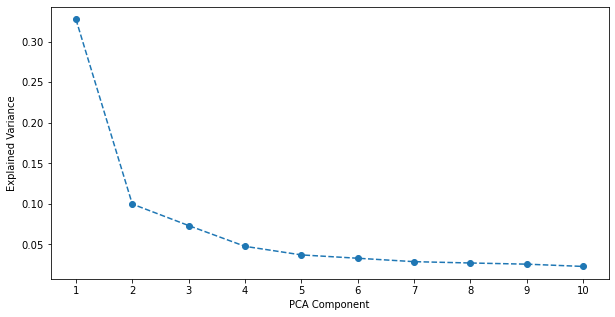

In [24]:
# Now we are running the data through PCA to help us visualize the data
pca = PCA(n_components=10)
reduced_data = pca.fit_transform(data)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

# Unlike MVP 2 we want to try to go ahead and see their explained variance
# and take accordingly
plt.figure(figsize=(10,5))
plt.plot(range(1,11),pca.explained_variance_ratio_, 'o--')
plt.xlabel("PCA Component")
plt.ylabel("Explained Variance")
plt.xticks(range(1,11));

Here we will proceed to take the first 4 components and continue on with our clustering algorithm.

Then just to make sure that we have good enough variance explained with our 4 components

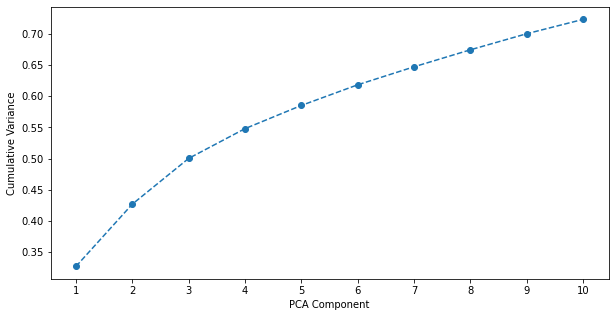

In [25]:
cum_var = []

cum_var.append(pca.explained_variance_ratio_[0])

for i in range(1, len(pca.explained_variance_ratio_)):
    cum_var.append(cum_var[i-1] + pca.explained_variance_ratio_[i])

plt.figure(figsize=(10,5))
plt.plot(range(1,11), cum_var, 'o--')
plt.xlabel("PCA Component")
plt.ylabel("Cumulative Variance")
plt.xticks(range(1,11));

In [26]:
cum_var[3]

0.5481076115305062

In [27]:
# So because we picked out the first 4 PCA we will be taking out those features
reduced_data = reduced_data[:, 0:4]
reduced_data.shape

(1650, 4)

In [29]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(reduced_data)

colormap = np.array(['Red', 'Blue', 'Green', 'Orange', 'Black', 'Magenta'])

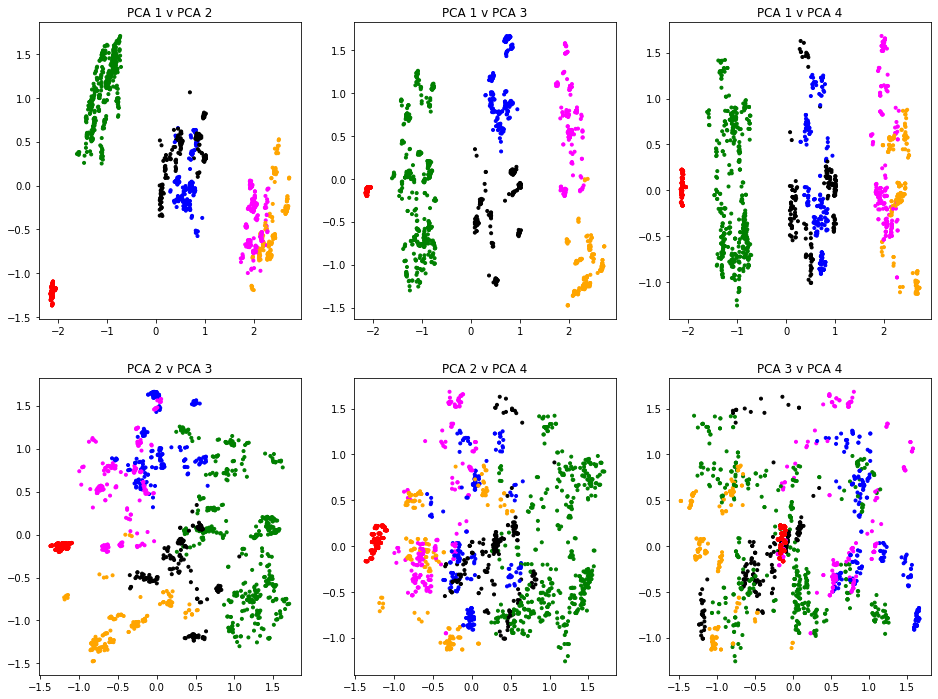

In [30]:
fig, axs = plt.subplots(2,3, figsize=(16,12))

axs[0,0].scatter(reduced_data[:, 0], reduced_data[:, 1], marker = '.', c = colormap[kmeans.labels_])
axs[0,0].set_title("PCA 1 v PCA 2");
axs[0,1].scatter(reduced_data[:, 0], reduced_data[:, 2], marker = '.', c = colormap[kmeans.labels_])
axs[0,1].set_title("PCA 1 v PCA 3");
axs[0,2].scatter(reduced_data[:, 0], reduced_data[:, 3], marker = '.', c = colormap[kmeans.labels_])
axs[0,2].set_title("PCA 1 v PCA 4");
axs[1,0].scatter(reduced_data[:, 1], reduced_data[:, 2], marker = '.', c = colormap[kmeans.labels_])
axs[1,0].set_title("PCA 2 v PCA 3");
axs[1,1].scatter(reduced_data[:, 1], reduced_data[:, 3], marker = '.', c = colormap[kmeans.labels_])
axs[1,1].set_title("PCA 2 v PCA 4");
axs[1,2].scatter(reduced_data[:, 2], reduced_data[:, 3], marker = '.', c = colormap[kmeans.labels_])
axs[1,2].set_title("PCA 3 v PCA 4");

plt.show()

Here as PCA 1 v PCA 3 looks the best to us, we will proceed with running everything in respect to this pairing

In [33]:
# exporting data to help with dashboard
data_pd["PCA-X"] = reduced_data[:, 0]
data_pd["PCA-Y"] = reduced_data[:, 2]
data_pd["CLUSTER"] = ag.labels_

data_pd.to_excel(path + "PCA-RCOMPL-KMEANS-KNN.xlsx")

Following code will then compare all the different features to the pca plot so this is very intensive.

Skip to MVP 3 scores aquisition for our conclusions

In [ ]:
for feature in data_pd.columns.values:
    try:
        if data_pd[feature].dtypes != 'float64':
            imputed_D2 = data_pd[feature].fillna('missing')
            le = LabelEncoder()
            ft = le.fit_transform(imputed_D2.values)
            tickers = le.inverse_transform(np.unique(ft))
            print(feature)

            plt.figure(figsize=(10,8))
            plt.scatter(reduced_data[:, 0], reduced_data[:,2], s = 10, alpha = 0.5, c=ft, cmap=plt.cm.get_cmap('tab20', len(tickers)))
            cb = plt.colorbar(ticks=range(len(tickers)))
            cb.set_ticklabels(tickers)
            plt.clim(-0.5, len(tickers)-0.5)
            plt.title("PCA 1 v PCA 3");
            plt.show()


        else:
            print(feature)

            plt.figure(figsize=(10,8))
            plt.scatter(reduced_data[:, 0], reduced_data[:,2], s = 10, alpha = 0.5, c=ft, cmap=plt.cm.get_cmap('tab20', len(tickers)))
            plt.colorbar()
            plt.title("PCA 1 v PCA 3");
            plt.show()
    except:
        pass

## Stimulation stage

This code is the same as for the recompletion section so comments will be sparse

In [31]:
# Read in the data and get all the numerical data to run through the
# clustering
data_pd = pd.read_excel(path + "STMSTG_RIG_SCALED_REPLACE.xlsx")

subset = data_pd.loc[:, data_pd.dtypes!=object]
subset

,UWI,UWI_SIDETRACK,FRAC_GRADIENT,BREAKDOWN_PRESSURE,HYDROSTATIC_PRESSURE,TREAT_AVG_PRESSURE,TREAT_MAX_PRESSURE,TREAT_MIN_PRESSURE,PROPPANT_DESIGNED,PROPPANT_IN_FORMATION,...,STIM_TREAT_SUPERVISOR_cat,DIVERSION_COMPANY_cat,DIVERSION_METHOD_cat,DELIVERY_MODE_cat,BOTTOM_HOLE_PRESSURE_METHOD_cat,STIMULATION_RESULT_cat,STIMULATION_RESULT_DETAIL_cat,STIMTREAT_ID_cat,FLUID_NAME_cat,CONTRACTOR_cat
0,2019000497,0,1,7538.0,5446.0,9898.0,11007.0,7538.0,520000,519600,...,33.0,6.0,4.0,1,0,4.0,5.0,16811,66.0,0
1,2019000496,0,1,7793.0,5403.0,10251.0,10885.0,7711.0,520000,519900,...,32.0,0.0,9.0,1,0,4.0,5.0,16576,66.0,0
2,2019000394,0,1,8650.0,5611.0,11022.0,11260.0,8190.0,420000,420000,...,24.2,5.0,11.0,1,0,4.0,9.0,4168,75.0,0
3,2019000491,0,1,6575.0,5044.0,9774.0,10077.0,6575.0,520000,523020,...,14.0,0.0,4.0,1,0,4.0,5.0,13979,29.0,0
4,2019000854,0,1,8723.0,5553.0,10707.0,11146.0,8190.0,420000,420130,...,18.4,1.0,11.0,1,0,4.0,9.0,1376,75.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17715,2019000059,0,1,6939.0,5074.0,10352.0,10458.0,7466.6,420000,420000,...,30.4,5.0,11.0,1,0,4.0,5.0,3925,31.0,4
17716,2019000064,0,1,6621.0,5195.0,9908.0,10207.0,7643.4,420000,422220,...,36.4,1.0,11.0,0,0,4.0,5.8,4708,75.0,4
17717,2019000065,0,1,7108.0,5178.0,9671.0,10151.0,7780.0,420000,418940,...,43.4,5.0,11.0,1,0,4.0,5.0,3857,31.0,4
17718,2019000061,0,1,6605.0,5251.0,10088.0,10420.0,7780.0,420000,420940,...,39.4,5.0,11.0,1,0,4.0,5.0,2537,75.0,4


In [32]:
# scale data
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(subset), columns=subset.columns)

In [33]:
scaled_df

,UWI,UWI_SIDETRACK,FRAC_GRADIENT,BREAKDOWN_PRESSURE,HYDROSTATIC_PRESSURE,TREAT_AVG_PRESSURE,TREAT_MAX_PRESSURE,TREAT_MIN_PRESSURE,PROPPANT_DESIGNED,PROPPANT_IN_FORMATION,...,STIM_TREAT_SUPERVISOR_cat,DIVERSION_COMPANY_cat,DIVERSION_METHOD_cat,DELIVERY_MODE_cat,BOTTOM_HOLE_PRESSURE_METHOD_cat,STIMULATION_RESULT_cat,STIMULATION_RESULT_DETAIL_cat,STIMTREAT_ID_cat,FLUID_NAME_cat,CONTRACTOR_cat
0,0.344779,0.0,0.5,0.674541,0.407940,0.874382,0.844873,0.687022,0.408243,0.399901,...,0.383721,0.250000,0.173913,0.5,0.0,0.9375,0.176471,0.948756,0.857143,0.0
1,0.344078,0.0,0.5,0.697360,0.404719,0.905565,0.835508,0.702789,0.408243,0.400132,...,0.372093,0.000000,0.391304,0.5,0.0,0.9375,0.176471,0.935493,0.857143,0.0
2,0.272600,0.0,0.5,0.774049,0.420300,0.973675,0.864292,0.746445,0.329735,0.323246,...,0.281395,0.208333,0.478261,0.5,0.0,0.9375,0.411765,0.235228,0.974026,0.0
3,0.340575,0.0,0.5,0.588367,0.377828,0.863428,0.773488,0.599253,0.408243,0.402534,...,0.162791,0.000000,0.173913,0.5,0.0,0.9375,0.176471,0.788927,0.376623,0.0
4,0.594954,0.0,0.5,0.780582,0.415955,0.945848,0.855542,0.746445,0.329735,0.323346,...,0.213953,0.041667,0.478261,0.5,0.0,0.9375,0.411765,0.077657,0.974026,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17715,0.037842,0.0,0.5,0.620940,0.380075,0.914488,0.802733,0.680514,0.329735,0.323246,...,0.353488,0.208333,0.478261,0.5,0.0,0.9375,0.176471,0.221514,0.402597,1.0
17716,0.041345,0.0,0.5,0.592483,0.389139,0.875265,0.783466,0.696628,0.329735,0.324955,...,0.423256,0.041667,0.478261,0.0,0.0,0.9375,0.223529,0.265703,0.974026,1.0
17717,0.042046,0.0,0.5,0.636063,0.387865,0.854329,0.779168,0.709078,0.329735,0.322430,...,0.504651,0.208333,0.478261,0.5,0.0,0.9375,0.176471,0.217676,0.402597,1.0
17718,0.039243,0.0,0.5,0.591051,0.393333,0.891166,0.799816,0.709078,0.329735,0.323969,...,0.458140,0.208333,0.478261,0.5,0.0,0.9375,0.176471,0.143180,0.974026,1.0


In [34]:
data = scaled_df.to_numpy()
data

array([[0.34477926, 0.        , 0.5       , ..., 0.94875557, 0.85714286,
        0.        ],
       [0.34407849, 0.        , 0.5       , ..., 0.93549297, 0.85714286,
        0.        ],
       [0.27259986, 0.        , 0.5       , ..., 0.23522772, 0.97402597,
        0.        ],
       ...,
       [0.04204625, 0.        , 0.5       , ..., 0.21767594, 0.4025974 ,
        1.        ],
       [0.03924317, 0.        , 0.5       , ..., 0.14317964, 0.97402597,
        1.        ],
       [0.04274702, 0.        , 0.5       , ..., 0.27749873, 0.97402597,
        1.        ]])

[0.30314816 0.08073389 0.06728871 0.05723558 0.03602463 0.033736
 0.03243228 0.02791864 0.02362143 0.02281501]
0.6849543239744184


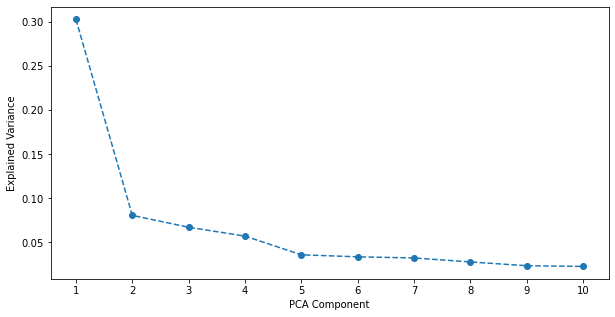

In [35]:
# Run the PCA and get the number of PCA components to grab
pca = PCA(n_components=10)
reduced_data = pca.fit_transform(data)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))


plt.figure(figsize=(10,5))
plt.plot(range(1,11),pca.explained_variance_ratio_, 'o--')
plt.xlabel("PCA Component")
plt.ylabel("Explained Variance")
plt.xticks(range(1,11));

Here we will also be grabbing 4 PCA components, so we will proceed accordingly

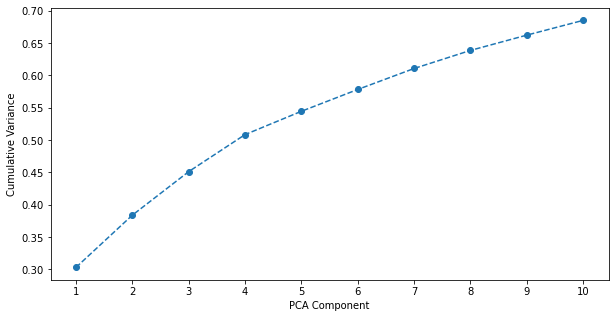

In [36]:
cum_var = []

cum_var.append(pca.explained_variance_ratio_[0])

for i in range(1, len(pca.explained_variance_ratio_)):
    cum_var.append(cum_var[i-1] + pca.explained_variance_ratio_[i])

plt.figure(figsize=(10,5))
plt.plot(range(1,11), cum_var, 'o--')
plt.xlabel("PCA Component")
plt.ylabel("Cumulative Variance")
plt.xticks(range(1,11));

In [37]:
cum_var[3]

0.5084063392609004

In [38]:
# So now reduce working data to those 4 components
reduced_data = reduced_data[:, 0:4]
reduced_data.shape

(17720, 4)

In [40]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(reduced_data)

colormap = np.array(['Red', 'Blue', 'Green', 'Orange', 'Black', 'Magenta'])

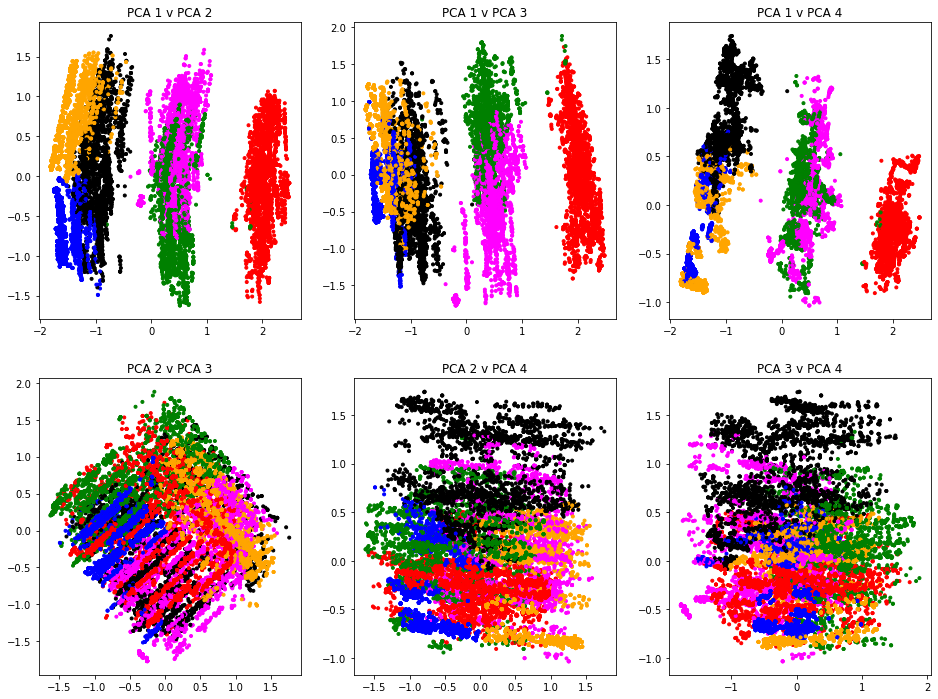

In [42]:
#Plot results
fig, axs = plt.subplots(2,3, figsize=(16,12))

axs[0,0].scatter(reduced_data[:, 0], reduced_data[:, 1], marker = '.', c = colormap[kmeans.labels_])
axs[0,0].set_title("PCA 1 v PCA 2");
axs[0,1].scatter(reduced_data[:, 0], reduced_data[:, 2], marker = '.', c = colormap[kmeans.labels_])
axs[0,1].set_title("PCA 1 v PCA 3");
axs[0,2].scatter(reduced_data[:, 0], reduced_data[:, 3], marker = '.', c = colormap[kmeans.labels_])
axs[0,2].set_title("PCA 1 v PCA 4");
axs[1,0].scatter(reduced_data[:, 1], reduced_data[:, 2], marker = '.', c = colormap[kmeans.labels_])
axs[1,0].set_title("PCA 2 v PCA 3");
axs[1,1].scatter(reduced_data[:, 1], reduced_data[:, 3], marker = '.', c = colormap[kmeans.labels_])
axs[1,1].set_title("PCA 2 v PCA 4");
axs[1,2].scatter(reduced_data[:, 2], reduced_data[:, 3], marker = '.', c = colormap[kmeans.labels_])
axs[1,2].set_title("PCA 3 v PCA 4");

plt.show()

Again, PCA 1 v PCA 3 is the best looking one so we will continue with it.

In [45]:
# Exporting for Dashboard use
data_pd["PCA-X"] = reduced_data[:, 0]
data_pd["PCA-Y"] = reduced_data[:, 2]
data_pd["CLUSTER"] = ag.labels_

data_pd.to_excel(path + "PCA-STMSTG-Agglomerative-KNN.xlsx")

Following code will then compare all the different features to the pca plot so this is very intensive.

Skip to MVP 3 scores aquisition for our conclusions

In [ ]:
for feature in data_pd.columns.values:
    try:
        if data_pd[feature].dtypes != 'float64':
            imputed_D2 = data_pd[feature].fillna('missing')
            le = LabelEncoder()
            ft = le.fit_transform(imputed_D2.values)
            tickers = le.inverse_transform(np.unique(ft))
            print(feature)

            plt.figure(figsize=(10,8))
            plt.scatter(reduced_data[:, 0], reduced_data[:,2], s = 10, alpha = 0.5, c=ft, cmap=plt.cm.get_cmap('tab20', len(tickers)))
            cb = plt.colorbar(ticks=range(len(tickers)))
            cb.set_ticklabels(tickers)
            plt.clim(-0.5, len(tickers)-0.5)
            plt.title("PCA 1 v PCA 3");
            plt.show()


        else:
            print(feature)

            plt.figure(figsize=(10,8))
            plt.scatter(reduced_data[:, 0], reduced_data[:,2], s = 10, alpha = 0.5, c=ft, cmap=plt.cm.get_cmap('tab20', len(tickers)))
            plt.colorbar()
            plt.title("PCA 1 v PCA 3");
            plt.show()
    except:
        pass